# Module 1: Classification

In this lab you will create a classification model on the same red wine quality dataset and then apply and practice the same training and validation methodology. 
The classification model will be based on Naive Bayes provided by sci-kit learn.

In [3]:
import os, sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline  

## Load Dataset

We will load the dataset from file into a Panda data frame and investigate its structure. 


In [4]:
# Dataset location
DATASET = '/dsa/data/all_datasets/wine-quality/winequality-red.csv'
assert os.path.exists(DATASET)

# Load and shuffle
dataset = pd.read_csv(DATASET, sep=';').sample(frac = 1).reset_index(drop=True)

# View some metadata of the dataset and see if that makes sense
print('dataset.shape', dataset.shape)

X = np.array(dataset.iloc[:,:-1])[:, [1,2,6,9,10]]
y = np.array(dataset.quality)

print('X', X.shape, 'y', y.shape)
print('Label distribution:', {i: np.sum(y==i) for i in np.unique(dataset.quality)})

dataset.shape (1599, 12)
X (1599, 5) y (1599,)
Label distribution: {3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}


In [5]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.9,0.44,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6
1,7.9,0.72,0.01,1.9,0.076,7.0,32.0,0.99668,3.39,0.54,9.6,5
2,7.8,0.87,0.26,3.8,0.107,31.0,67.0,0.99668,3.26,0.46,9.2,5
3,8.0,0.64,0.22,2.4,0.094,5.0,33.0,0.99612,3.37,0.58,11.0,5
4,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6


Describe dataset.

In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Make the train/test split and then train the model

In [7]:
# You have seen this before!
# If you are so inclined, you may want to tweak the test_size and see how the model performs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)

model1 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model1.fit(X_train, y_train)
print(f"Acc with gini: {model1.score(X_test, y_test)}")


model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)
print(f"Acc with entropy: {model2.score(X_test, y_test)}")


Acc with gini: 0.5464285714285714
Acc with entropy: 0.5616071428571429


Optionally you can print out a sample and see for yourself how the classification performs.

In [10]:
model = model1
# model = model2

print(y[20:50], " (True class value)")
print(model.predict(X[20:50]), " (Predicted class value)")

[7 6 5 5 6 5 5 5 6 6 5 7 5 5 5 8 5 6 7 6 5 7 7 6 6 6 7 5 6 5]  (True class value)
[6 7 5 5 6 5 5 5 5 5 5 6 5 5 5 7 5 5 7 6 6 5 5 6 5 5 6 5 6 5]  (Predicted class value)


## Visualizing Decision Tree

### A text representation of the tree

In [12]:
text_representation = export_text(model1)
print(text_representation)

|--- feature_4 <= 10.25
|   |--- feature_3 <= 0.56
|   |   |--- feature_0 <= 0.45
|   |   |   |--- feature_3 <= 0.52
|   |   |   |   |--- class: 5
|   |   |   |--- feature_3 >  0.52
|   |   |   |   |--- class: 6
|   |   |--- feature_0 >  0.45
|   |   |   |--- feature_0 <= 1.06
|   |   |   |   |--- class: 5
|   |   |   |--- feature_0 >  1.06
|   |   |   |   |--- class: 4
|   |--- feature_3 >  0.56
|   |   |--- feature_2 <= 46.50
|   |   |   |--- feature_2 <= 43.00
|   |   |   |   |--- class: 5
|   |   |   |--- feature_2 >  43.00
|   |   |   |   |--- class: 6
|   |   |--- feature_2 >  46.50
|   |   |   |--- feature_0 <= 0.30
|   |   |   |   |--- class: 6
|   |   |   |--- feature_0 >  0.30
|   |   |   |   |--- class: 5
|--- feature_4 >  10.25
|   |--- feature_3 <= 0.63
|   |   |--- feature_4 <= 11.45
|   |   |   |--- feature_2 <= 22.00
|   |   |   |   |--- class: 5
|   |   |   |--- feature_2 >  22.00
|   |   |   |   |--- class: 6
|   |   |--- feature_4 >  11.45
|   |   |   |--- feature_1 

### Graph visualization

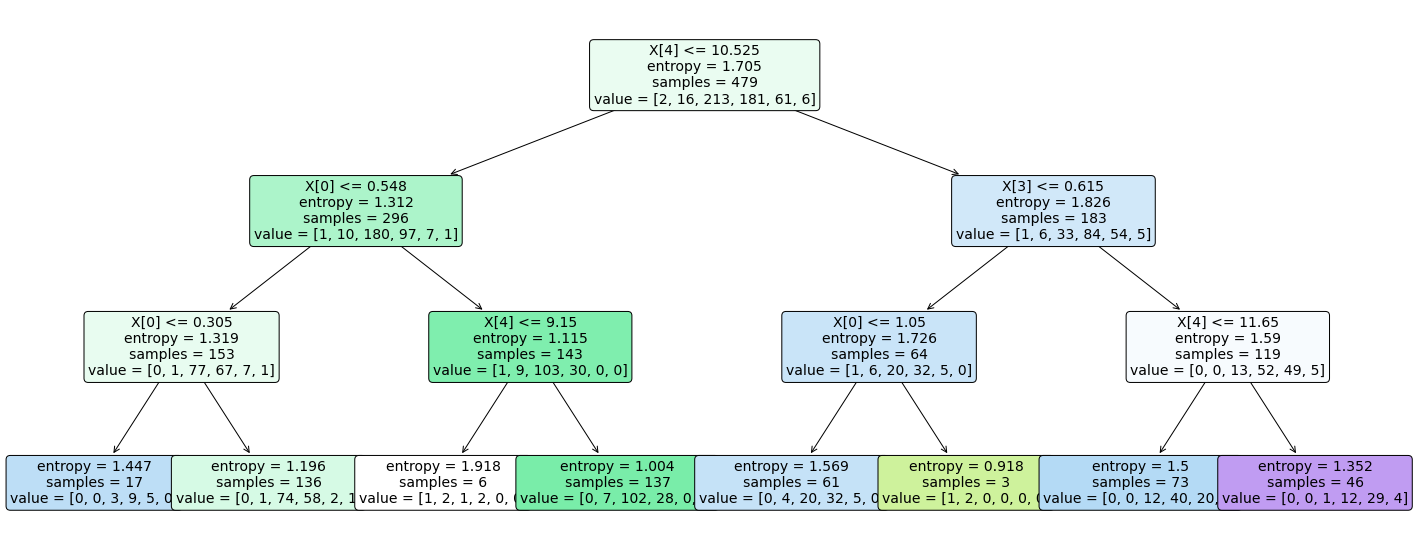

In [13]:
plt.figure(figsize=(25,10))
a = plot_tree(model2, 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Model Evaluation

Usually a classifier's peformance quantified in terms of precison, reall, f1, and accuracy measures. These measures are calculated from [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html). 

In [14]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix with expected value, predicted values... similar to RMSE 
confusion_matrix(y_test, model.predict(X_test))

array([[  0,   0,   8,   0,   0,   0],
       [  0,   0,  26,  11,   0,   0],
       [  0,   1, 365,  92,  10,   0],
       [  0,   0, 203, 205,  49,   0],
       [  0,   0,  24,  72,  42,   0],
       [  0,   0,   1,   6,   5,   0]])

### Beyond Confusion Matrix: Precision, Recall, and F1

Here we are going to look at a couple additional measures.

First: 
  * _condition positive_ (P) is the number of real positive cases in the data
  * _condition negatives_ (N) is the number of real negative cases in the data 

Then: 
  * _true positive_ (TP) is a correct prediction of a class, eqv. with hit in a Yes / No model
  * _true negative_ (TN) is a correct prediction of not a class, eqv. with correct rejection in a Yes / No model
  * _false positive_ (FP) is misclassification, eqv. with false alarm in a Yes / No model, **Type I error**
  * _false negative_ (FN) is misclassification, eqv. with miss in a Yes / No model, **Type II error** 

Metrics:
  * Recall or True Positive Rate:$$ Recall = \frac{TP}{P} = \frac{TP}{TP+FN} $$ 
  * Precision or Positive Predictive Value:$$ Precision = \frac{TP}{TP+FP} $$
  * [F1 is the harmonic mean of precision and recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)$$ F_{1} = 2 * \frac{Precision * Recall}{Precision + Recall}$$
  * Accuracy: $$ Accuracy = \frac{TP + TN}{TP+FP+TN+FN} $$
  
#### More details on scikit-learn model scoring:
http://scikit-learn.org/stable/modules/model_evaluation.html

In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Check the API of these functions to learn more about the parameters

print("Precision  :", np.round(precision_score(y_test, model.predict(X_test), average='weighted'), 2))
print("Recall     :", np.round(precision_score(y_test, model.predict(X_test), average='weighted'), 2))
print("F1-Score   :", np.round(f1_score(y_test, model.predict(X_test), average='weighted'), 2))
print("Accuracy   :", np.round(accuracy_score(y_test, model.predict(X_test)), 2))


Precision  : 0.51
Recall     : 0.51
F1-Score   : 0.52
Accuracy   : 0.55


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above scores could be estimated with a call to `classification_report`. 

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        37
           5       0.58      0.78      0.67       468
           6       0.53      0.45      0.49       457
           7       0.40      0.30      0.34       138
           8       0.00      0.00      0.00        12

    accuracy                           0.55      1120
   macro avg       0.25      0.26      0.25      1120
weighted avg       0.51      0.55      0.52      1120



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Note:** The F1 score integrates the two metrics precision and recall into one.
As it is one type of mean operation implies, the value of F1 score lies in between the two metrics.  
In the scikit-learn package, `f1_score()` is generalized to multiclass targets. Therefore the last parameter `average` is referring to the algorithm of choice for averaging over multiple classes.  
There is a more detailed explanation on this parameter in the documentation, as the discussion of different types of methodologies for integrating metrics would extend to a whole another subject of data fusion: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

---